<a href="https://colab.research.google.com/github/anirudh14397/Netflix-Data-Analysis-and-Exploration/blob/main/Netflix_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NETFLIX DATA ANALYSIS BUSINESS CASE STUDY**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
data=pd.read_csv("/content/drive/MyDrive/Datasets/netflix.csv")

In [ ]:
#Overview of dataset
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Taking copy of dataset
df=data.copy()

In [ ]:
#columns of dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#statistical summary of dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#checking missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#checking the details of missing duration values
df[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We can see that rating has the duration values so we have to fix them

In [ ]:
#changing rating and duration of above rows
rating_replacement={5541: 'TV-MA',5794: 'NR',5813: 'TV-MA'} # rating taken from internet
duration_replacement={5541: '74 min',5794: '84 min',5813: '66 min'}
for id,duration_change in duration_replacement.items():
  df.iloc[id,9]=duration_change
for id,rating_change in rating_replacement.items():
  df.iloc[id,8]=rating_change

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Checking rows where rating is null
df[df["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
#Assigning ratings to null rows 
rating_replacement={5989:'TV-PG',6827:'TV-14',7312: 'TV-MA',7537: 'TV-MA'}
for id,rating_change in rating_replacement.items():
  df.iloc[id,8]=rating_change

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Handling missing values
df["director"].fillna("Director not available",inplace=True)
df["cast"].fillna("Cast not available",inplace=True)

In [ ]:
#dropping rows with no date added info
df=df[df["date_added"].notna()] 

In [ ]:
#Replacing country with mode value
df['country'] = df['country'].fillna(df['country'].mode()[0]) 

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
cast=df["cast"].apply(lambda x: str(x).split(", ")).to_list() #spliting the cast column to different columns
cast_df=pd.DataFrame(cast,index=df['title']) # creating DataFrame from cast Series
cast_df=cast_df.stack() #stacking columns to rows
cast_df=cast_df.reset_index() #resetting index
cast_df.drop(columns="level_1",inplace=True) #dropping unnecessary columns
cast_df.columns=["title","cast"] #defining correct column names
cast_df.head()

,title,cast
0,Dick Johnson Is Dead,Cast not available
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
df_1=df.merge(cast_df,on='title',how='left') # merging cast_df with df using left join
df_1

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Cast not available
1,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64877,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64878,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64879,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64880,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [ ]:
genre=df["listed_in"].apply(lambda x: str(x).split(", ")).to_list()
genre_df=pd.DataFrame(genre,index=df['title'])
genre_df=genre_df.stack()
genre_df=genre_df.reset_index()
genre_df.drop(columns="level_1",inplace=True)
genre_df.columns=["title","listed_in"]
genre_df.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
df_final=df_1.merge(genre_df,on="title",how="left")# merging genre_df with df_1 using left join

In [ ]:
df_final.head()

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in_x,description,cast_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Cast not available,Documentaries
1,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows


In [ ]:
#removing unnecessary columns
df_final.drop(columns=["cast_x","listed_in_x","description"],inplace=True)

In [ ]:
#renaming columns
df_final=df_final.rename(columns={"cast_y":"cast","listed_in_y":"genre"})
df_final.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,cast,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Cast not available,Documentaries
1,s2,TV Show,Blood & Water,Director not available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,Director not available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,Director not available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,Director not available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows


In [ ]:
#checking shape of final DataFrame
df_final.shape

(149354, 11)

In [ ]:
# retrieving just the first country
df_final['principal_country'] = df_final['country'].apply(lambda x: x.split(",")[0])
df_final['principal_country'].head()

0    United States
1     South Africa
2     South Africa
3     South Africa
4     South Africa
Name: principal_country, dtype: object

In [ ]:
#unique countries
df_final['principal_country'].nunique()

86

In [ ]:
#removing country as we will be referring principal country for analysis
df_final.drop(columns="country",inplace=True)
df_final.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Cast not available,Documentaries,United States
1,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,South Africa


In [ ]:
#creating column of year added to Netflix
df_final['year_added'] = df_final['date_added'].apply(lambda x: x.split(" ")[-1])
df_final['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

**NETFLIX SOURCE DISTRIBUTION (TV Show VS Movies)**

In [ ]:
#counting unique values for 'type'
df_final['type'].value_counts()

Movie      101692
TV Show     47662
Name: type, dtype: int64

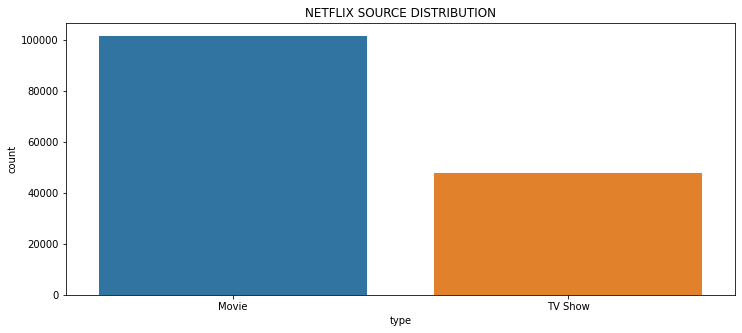

In [ ]:
#Plotting source distribution type using seaborn
fig = plt.figure(figsize=(12,5))
plt.title("NETFLIX SOURCE DISTRIBUTION")
sns.countplot(x='type', data=df_final) 
plt.show()

The graph shows that Netflix offers more options for Movies as comapred to TV Shows. The number of Movies are almost as TWICE as the number of TV Shows on Netflix.

**YEAR-WISE DISTRIBUTION**

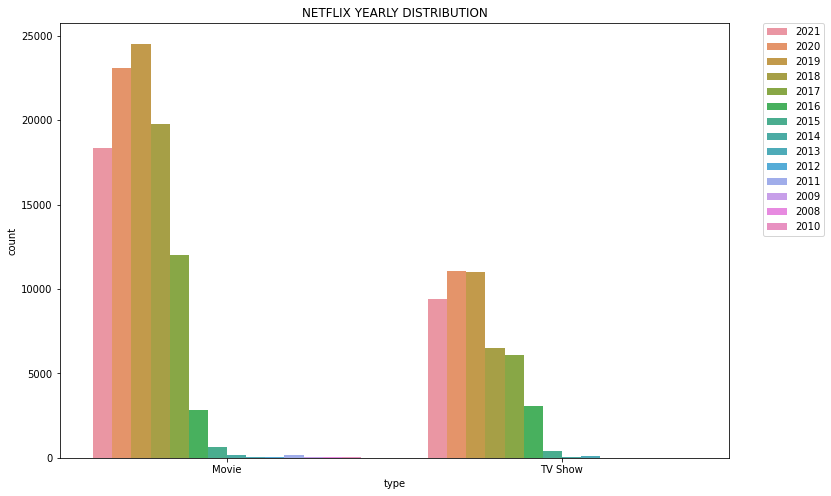

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.title("NETFLIX YEARLY DISTRIBUTION")
sns.countplot(x='type', data=df_final, hue="year_added")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It can be concluded that in recent years,there has been increase in numbers of shows and movies on Netflix.

In 2019, most number of films were added whereas In 2019 & 2020 most number of shows were added.

**TOP 5 COUNTRIES CREATING MOST CONTENT**

In [ ]:
#Calculating unique countries count present
df_final['principal_country'].value_counts().head(5)

United States     56512
India             20526
United Kingdom     9324
Japan              6818
South Korea        4556
Name: principal_country, dtype: int64

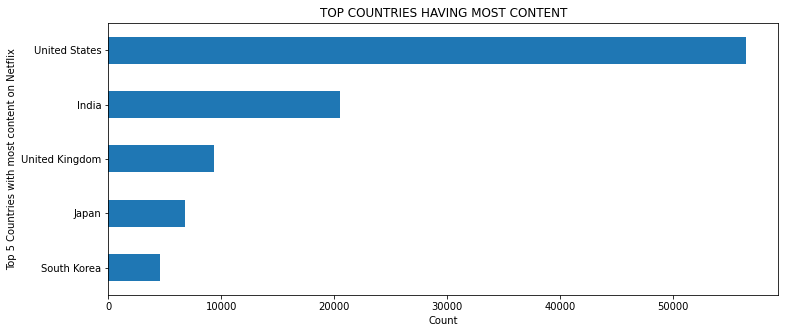

In [ ]:
fig = plt.figure(figsize=(12,5))
df_final['principal_country'].value_counts()[:5].sort_values().plot(kind="barh") # plotting horizontal barplot using pandas
plt.xlabel("Count")
plt.ylabel("Top 5 Countries with most content on Netflix")
plt.title("TOP COUNTRIES HAVING MOST CONTENT")
plt.show()

United States leads followed by India.

**TOP 10 GENERES FOR MOVIES AND TV SHOWS**

In [ ]:
#Calculating unique count of genres present
df_final['genre'].value_counts().head(10)

Dramas                      20778
International Movies        20669
Comedies                    15197
International TV Shows      11311
Action & Adventure           8060
TV Dramas                    7464
Independent Movies           6300
Children & Family Movies     5634
Romantic Movies              5221
Thrillers                    4821
Name: genre, dtype: int64

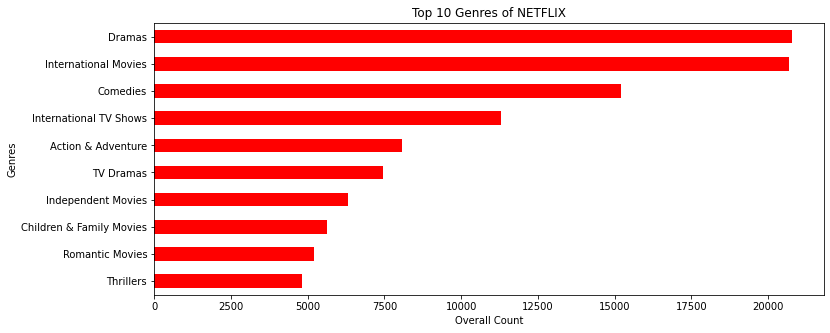

In [ ]:
fig = plt.figure(figsize=(12,5))
df_final["genre"].value_counts()[:10].sort_values().plot(kind="barh",color='red') #plotting vertical barplot
plt.ylabel("Genres")
plt.xlabel("Overall Count")
plt.title("Top 10 Genres of NETFLIX")
plt.show()

Most preferred genre is Drama. Although Foreign Movies and TV Shows are on the rise.

**NETFLIX MOVIES ANALYSIS**

In [ ]:
movies_df=df_final[df_final["type"]=="Movie"]
movies_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Cast not available,Documentaries,United States,2021
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Vanessa Hudgens,Children & Family Movies,United States,2021
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Kimiko Glenn,Children & Family Movies,United States,2021
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,James Marsden,Children & Family Movies,United States,2021
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Sofia Carson,Children & Family Movies,United States,2021


In [ ]:
#converting year added column to int64 type
movies_df['year_added']=movies_df['year_added'].astype(np.int64) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#adding time gap column 
movies_df['time_gap']=movies_df['year_added']-movies_df['release_year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
movies_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added,time_gap
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Cast not available,Documentaries,United States,2021,1
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Vanessa Hudgens,Children & Family Movies,United States,2021,0
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Kimiko Glenn,Children & Family Movies,United States,2021,0
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,James Marsden,Children & Family Movies,United States,2021,0
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Sofia Carson,Children & Family Movies,United States,2021,0


**OLDEST MOVIES ADDED TO THE NETFLIX**

In [ ]:
movies_df.sort_values(by='time_gap',ascending=False).head(6)

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added,time_gap
139409,s8206,Movie,The Battle of Midway,John Ford,"March 31, 2017",1942,TV-14,18 min,Henry Fonda,Classic Movies,United States,2017,75
139410,s8206,Movie,The Battle of Midway,John Ford,"March 31, 2017",1942,TV-14,18 min,Henry Fonda,Documentaries,United States,2017,75
132529,s7791,Movie,Prelude to War,Frank Capra,"March 31, 2017",1942,TV-14,52 min,Cast not available,Documentaries,United States,2017,75
132528,s7791,Movie,Prelude to War,Frank Capra,"March 31, 2017",1942,TV-14,52 min,Cast not available,Classic Movies,United States,2017,75
139411,s8206,Movie,The Battle of Midway,John Ford,"March 31, 2017",1942,TV-14,18 min,Jane Darwell,Classic Movies,United States,2017,75
139412,s8206,Movie,The Battle of Midway,John Ford,"March 31, 2017",1942,TV-14,18 min,Jane Darwell,Documentaries,United States,2017,75


We found that movies released in 1942 are the oldest movies added to Netflix

In [ ]:
#Extracting mins from duration column
movies_df['Duration(in mins)'] = movies_df["duration"].str.extract(r'\b(\w+)', expand=True)
movies_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added,time_gap,Duration(in mins)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Cast not available,Documentaries,United States,2021,1,90
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Vanessa Hudgens,Children & Family Movies,United States,2021,0,91
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Kimiko Glenn,Children & Family Movies,United States,2021,0,91
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,James Marsden,Children & Family Movies,United States,2021,0,91
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,PG,91 min,Sofia Carson,Children & Family Movies,United States,2021,0,91


In [ ]:
#changing type of duration to int64
movies_df['Duration(in mins)']=movies_df['Duration(in mins)'].astype(np.int64) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Dropping the old duration column from movies dataset
movies_df.drop("duration",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**FINDING THE ACTOR WHO HAS ACTED IN MOST NUMBER OF NETFLIX MOVIES**

In [ ]:
movies_df["cast"].value_counts()

Cast not available    807
Anupam Kher           117
Shah Rukh Khan         99
Naseeruddin Shah       92
Akshay Kumar           85
                     ... 
Efrat Dor               1
Val Maloku              1
Brad Davis              1
Ashley Rogan            1
Ross Noble              1
Name: cast, Length: 25952, dtype: int64

We see that movies that are added in Netflix,"Anupam Kher" has acted in most of the movies

In [ ]:
movies_df[movies_df["cast"]=="Anupam Kher"]["genre"].value_counts()

International Movies        38
Dramas                      28
Comedies                    20
Action & Adventure          12
Romantic Movies              7
Music & Musicals             5
Independent Movies           2
Thrillers                    2
Sci-Fi & Fantasy             1
Classic Movies               1
Children & Family Movies     1
Name: genre, dtype: int64

Anupam kher has acted in most number of International Movies category followed by Drama.


**MEDIAN & MEAN DURATION OF MOVIES**

In [ ]:
#Median duration of Movies
median_duration=movies_df["Duration(in mins)"].median()
print(median_duration)

104.0


Median duration of movies is 104 mins

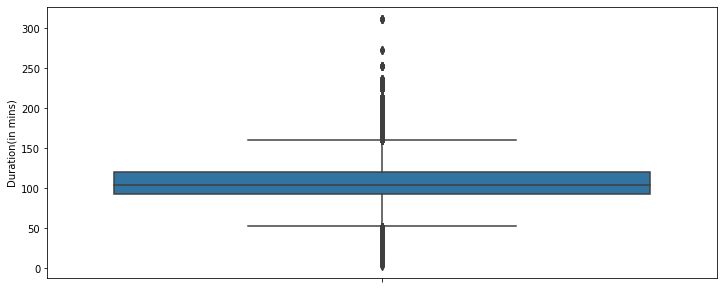

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(y="Duration(in mins)",data=movies_df)
plt.show()

In [ ]:
#mean Duration of movies
mean_duration=movies_df["Duration(in mins)"].mean()
print(mean_duration)

107.63777878299177


Mean duration of movies is approx 108 mins

**DISTRIBUTION OF DURATION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


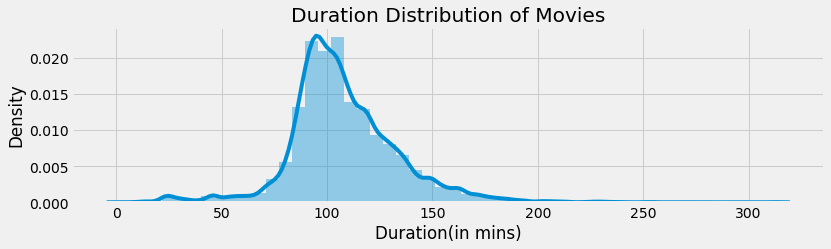

In [ ]:
fig = plt.figure(figsize=(12,3))
plt.title("Duration Distribution of Movies")
sns.distplot(movies_df["Duration(in mins)"])
plt.show()

Netflix have very few short films.

More content of 100 mins and above.

**DIRECTOR WHO HAS DIRECTED THE MOST MOVIES**

In [ ]:
movies_df["director"].value_counts()

Director not available          1204
Cathy Garcia-Molina              356
Youssef Chahine                  288
Martin Scorsese                  273
David Dhawan                     270
                                ... 
Lucy van Beek                      1
Will Allen                         1
Junior Carelli, Rudge Campos       1
Sandy Chronopoulos                 1
Kirsten Johnson                    1
Name: director, Length: 4355, dtype: int64

"Cathy Garcia-Molina" has directed most number of Netflix Movies

In [ ]:
movies_df[movies_df["director"]=="Cathy Garcia-Molina"]["genre"].value_counts()

International Movies    125
Dramas                   86
Romantic Movies          81
Comedies                 64
Name: genre, dtype: int64

Cathy Garcia-Molina" has directed most number of International Movies

In [ ]:
movies_df[movies_df["director"]=="Cathy Garcia-Molina"]["cast"].value_counts()

Joross Gamboa       17
John Lloyd Cruz     13
Kathryn Bernardo    12
Al Tantay           11
Irma Adlawan         8
                    ..
Bing Pimental        2
Johnny Revilla       2
Carlos Agassi        2
JM de Guzman         2
Nico Antonio         2
Name: cast, Length: 90, dtype: int64

Cathy has worked with Joross Gamboa the most

**MOST POPULAR RATING**

In [ ]:
movies_df["rating"].value_counts()

TV-MA       31491
TV-14       25001
R           15098
PG-13        9860
TV-PG        8135
PG           5955
TV-Y7        1600
TV-G         1508
TV-Y         1159
NR            979
G             728
NC-17          71
UR             65
TV-Y7-FV       42
Name: rating, dtype: int64

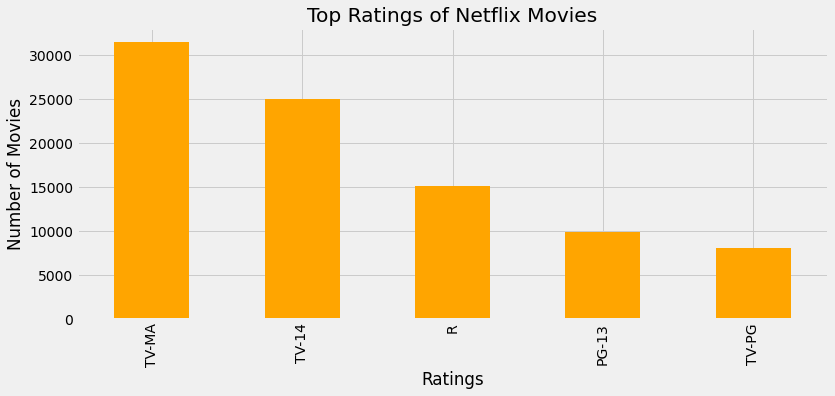

In [ ]:
fig = plt.figure(figsize=(12,5))
movies_df["rating"].value_counts()[:5].sort_values(ascending=False).plot(kind='bar',color='orange')
plt.title("Top Ratings of Netflix Movies")
plt.xlabel('Ratings')
plt.ylabel("Number of Movies")
plt.show()

This shows that most of the content in Netflix is mature content. 

The rise of OTT platforms like Netflix is due to able to show mature content which caters a large audience which are not allowed in traditional cable TV

**DISTRIBUTION OF DURATION OF MOVIES RELEASED WITH GENRE**

In [ ]:
movies_df["genre"].value_counts()[:10].sort_values(ascending=False)

Dramas                      20778
International Movies        20669
Comedies                    15197
Action & Adventure           8060
Independent Movies           6300
Children & Family Movies     5634
Romantic Movies              5221
Thrillers                    4821
Horror Movies                3069
Music & Musicals             2434
Name: genre, dtype: int64

In [ ]:
# Defining an empty list for colrs
colors = []

# Iterating over rows of movies_df 
for genre, row in movies_df.iterrows() :
    if row['genre']=="Dramas" :
        colors.append("red")
    elif  row['genre']=="International Movies" :
        colors.append("blue")
    elif  row['genre']=="Comedies" :
        colors.append("green")
    elif  row['genre']=="Action & Adventure":
        colors.append("yellow")
    elif  row['genre']=="Independent Movies":
        colors.append("orange")
    else:
        colors.append("black")


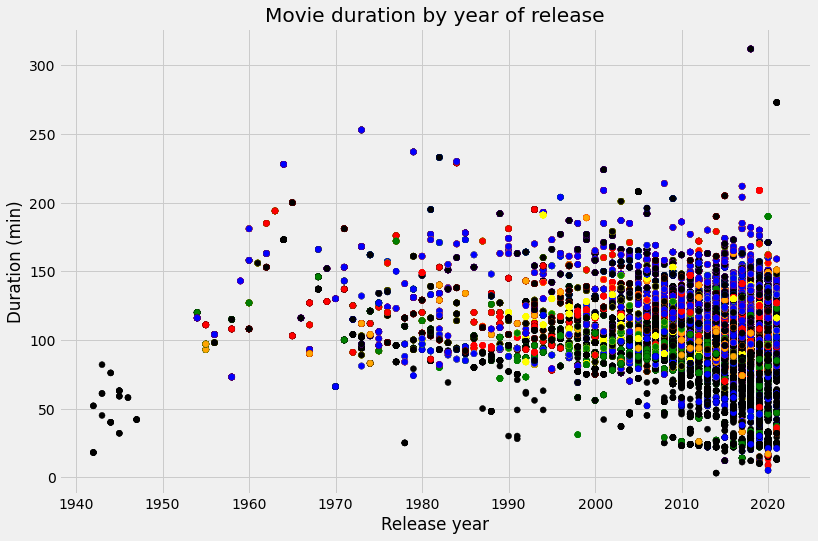

In [ ]:
#Defining size and style of the plot
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(movies_df['release_year'],movies_df['Duration(in mins)'],c=colors)

# Creating a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()


In [ ]:
movies_df["date_added"]=pd.to_datetime(movies_df["date_added"])
movies_df['month'] = movies_df['date_added'].apply(lambda datetime: datetime.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


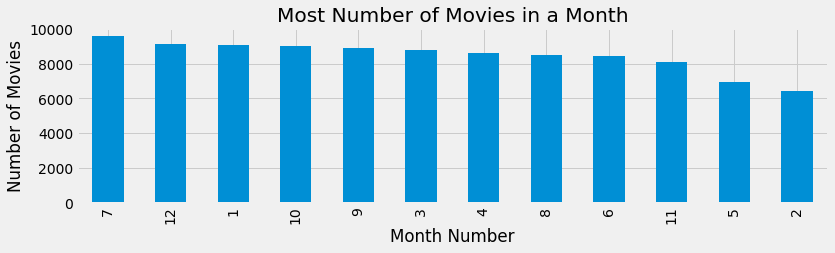

In [ ]:
fig = plt.figure(figsize=(12,3))
movies_df["month"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Most Number of Movies in a Month")
plt.ylabel("Number of Movies")
plt.xlabel("Month Number")
plt.show()

Most of the movies are added in July

**TV SHOW ANALYSIS**

In [ ]:
tvshows_df=df_final[df_final["type"]=="TV Show"]
tvshows_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added
1,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,South Africa,2021
2,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,South Africa,2021
3,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,South Africa,2021
4,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,South Africa,2021
5,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,TV Dramas,South Africa,2021


In [ ]:
tvshows_df['year_added']=tvshows_df['year_added'].astype(np.int64) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#adding time gap column 
tvshows_df['time_gap']=tvshows_df['year_added']-tvshows_df['release_year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tvshows_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added,time_gap
1,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,South Africa,2021,0
2,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,South Africa,2021,0
3,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,South Africa,2021,0
4,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,South Africa,2021,0
5,s2,TV Show,Blood & Water,Director not available,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,TV Dramas,South Africa,2021,0


**OLDEST TV SHOW IN NETFLIX**

In [ ]:
tvshows_df.sort_values(by='time_gap',ascending=False).head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,genre,principal_country,year_added,time_gap
76914,s4251,TV Show,Pioneers: First Women Filmmakers*,Director not available,"December 30, 2018",1925,TV-14,1 Season,Cast not available,TV Shows,United States,2018,93
24861,s1332,TV Show,Five Came Back: The Reference Films,Director not available,"February 9, 2021",1945,TV-MA,1 Season,Cast not available,TV Shows,United States,2021,76
131930,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...","February 1, 2017",1946,TV-14,1 Season,Cast not available,TV Shows,United States,2017,71
144825,s8542,TV Show,The Twilight Zone (Original Series),Director not available,"July 1, 2017",1963,TV-14,4 Seasons,Rod Serling,TV Sci-Fi & Fantasy,United States,2017,54
144824,s8542,TV Show,The Twilight Zone (Original Series),Director not available,"July 1, 2017",1963,TV-14,4 Seasons,Rod Serling,Classic & Cult TV,United States,2017,54


The oldest TV show added to Netflix is from 1925 

**TV SHOW DURATION IN NETFLIX**

In [ ]:
tvshows_df["duration"].value_counts()

1 Season      30168
2 Seasons      8073
3 Seasons      4007
4 Seasons      1750
5 Seasons      1418
7 Seasons       664
6 Seasons       603
8 Seasons       280
9 Seasons       257
10 Seasons      145
13 Seasons      102
12 Seasons       78
15 Seasons       69
17 Seasons       30
11 Seasons       18
Name: duration, dtype: int64

Most TV shows only have 1 season

**DIRECTOR WHO HAS DIRECTED MOST TV SHOWS**

In [ ]:
tvshows_df["director"].value_counts()

Director not available                                                                                          43259
Rob Seidenglanz                                                                                                   103
Kongkiat Komesiri                                                                                                  75
Danny Cannon                                                                                                       75
Pass Patthanakumjon                                                                                                66
                                                                                                                ...  
Glenn Weiss                                                                                                         1
Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad Mustafa, Hikaru Toda, Chico Pereira, Elaine McMillion Sheldon        1
Steven Bognar, Julia Reichert                           

 Rob Seidenglanz has directed most TV shows

In [ ]:
tvshows_df[tvshows_df["director"]=="Rob Seidenglanz"]["genre"].value_counts()

Crime TV Shows           23
TV Dramas                23
TV Mysteries             23
TV Action & Adventure    17
TV Sci-Fi & Fantasy      17
Name: genre, dtype: int64

Rob Seidenglanz has directed most Crime TV shows

In [ ]:
tvshows_df[tvshows_df["director"]=="Rob Seidenglanz"]["cast"].value_counts()

K.J. Apa                     3
Lochlyn Munro                3
Skeet Ulrich                 3
Nathalie Boltt               3
Lili Reinhart                3
Martin Cummins               3
Hayley Law                   3
Barclay Hope                 3
Asha Bromfield               3
Molly Ringwald               3
Colin Lawrence               3
Peter Bryant                 3
Sarah Habel                  3
Mark Consuelos               3
Madelaine Petsch             3
Charles Melton               3
Cole Sprouse                 3
Marisol Nichols              3
Camila Mendes                3
Ashleigh Murray              3
Mädchen Amick                3
Luke Perry                   3
Casey Cott                   3
Arthur Darvill               2
Jes Macallan                 2
Nils Hognestad               2
Simon Merrells               2
Christina Brucato            2
Adam Tsekhman                2
Tala Ashe                    2
Wentworth Miller             2
Franz Drameh                 2
Nick Zan

**COMMON RATINGS OF TV SHOWS IN NETFLIX**

In [ ]:
tvshows_df["rating"].value_counts()

TV-MA       25195
TV-14       13615
TV-PG        3798
TV-Y7        2677
TV-Y         1247
TV-G          927
NR            125
R              54
TV-Y7-FV       24
Name: rating, dtype: int64

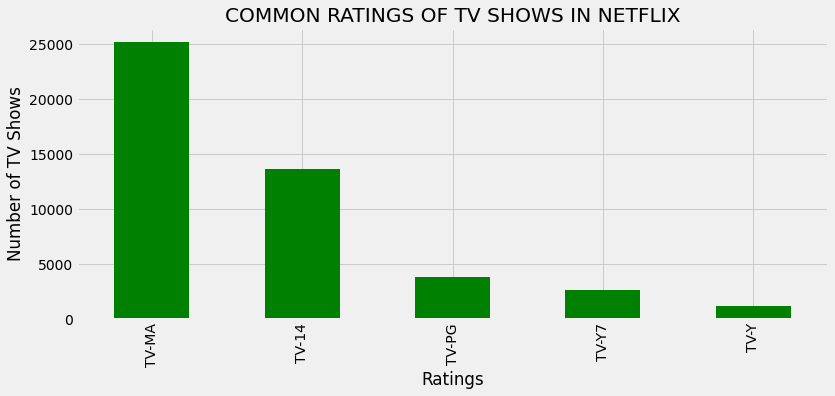

In [ ]:
fig = plt.figure(figsize=(12,5))
tvshows_df["rating"].value_counts()[:5].sort_values(ascending=False).plot(kind='bar',color='green')
plt.title("COMMON RATINGS OF TV SHOWS IN NETFLIX")
plt.xlabel('Ratings')
plt.ylabel("Number of TV Shows")
plt.show()

**MOST PREFERRED TV SHOW GENRES IN NETFLIX**

In [ ]:
tvshows_df["genre"].value_counts()[:10].sort_values(ascending=False)

International TV Shows       11311
TV Dramas                     7464
TV Comedies                   4433
Crime TV Shows                3988
Kids' TV                      3246
Romantic TV Shows             2903
Anime Series                  2108
Spanish-Language TV Shows     1817
TV Action & Adventure         1778
British TV Shows              1415
Name: genre, dtype: int64

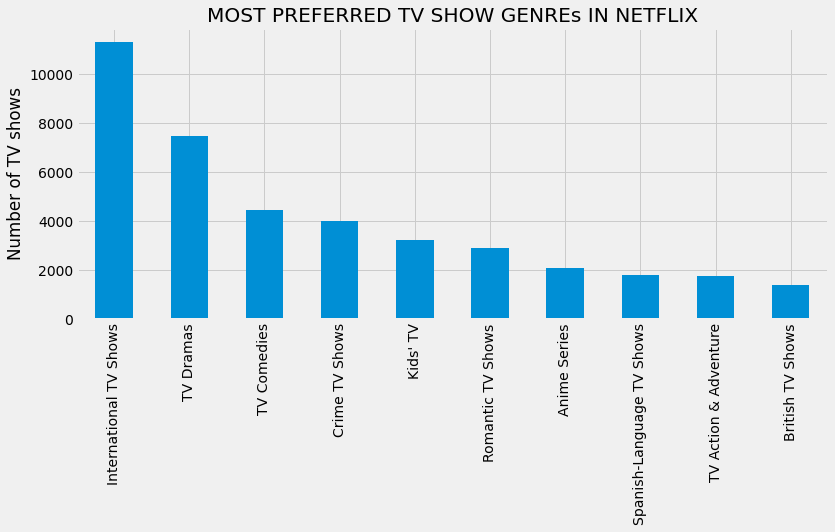

In [ ]:
fig = plt.figure(figsize=(12,5))
tvshows_df["genre"].value_counts()[:10].sort_values(ascending=False).plot(kind="bar")
plt.title("MOST PREFERRED TV SHOW GENREs IN NETFLIX")
plt.ylabel("Number of TV shows")
plt.show()

In [ ]:
tvshows_df["date_added"]=pd.to_datetime(tvshows_df["date_added"])
tvshows_df['month'] = tvshows_df['date_added'].apply(lambda datetime: datetime.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


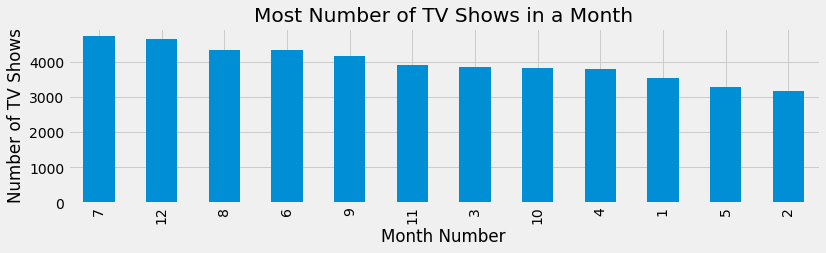

In [ ]:
fig = plt.figure(figsize=(12,3))
tvshows_df["month"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Most Number of TV Shows in a Month")
plt.ylabel("Number of TV Shows")
plt.xlabel("Month Number")
plt.show()

In July most of the TV shows are released 

**ACTOR WHO HAS ACTED IN MOST NUMBER OF TV SHOWS**

In [ ]:
tvshows_df["cast"].value_counts()

Cast not available    697
Takahiro Sakurai       55
Yuki Kaji              44
Ai Kayano              41
David Attenborough     41
                     ... 
Donald Glover           1
Ken Jeong               1
Rhashan Stone           1
Hannah Jane Fox         1
Kim Hawthorne           1
Name: cast, Length: 14815, dtype: int64

Takahiro Sakurai has acted in most number of TV shows

In [ ]:
tvshows_df[tvshows_df["cast"]=="Takahiro Sakurai"]["genre"].value_counts()

Anime Series              24
International TV Shows    22
Teen TV Shows              5
Kids' TV                   1
TV Thrillers               1
TV Shows                   1
Crime TV Shows             1
Name: genre, dtype: int64

Takahiro Sakurai has acted in Anime Series the most